In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import NearestNeighbors

import knntools

import warnings
warnings.filterwarnings('ignore')


In [3]:
tracks = pd.read_csv('../spotify_data.csv')

tracks['artist_name'] = tracks['artist_name'].str.strip().str.lower()
tracks['track_name'] = tracks['track_name'].str.strip().str.lower()


# print(tracks.columns.tolist())

tracks.drop_duplicates()
tracks.dropna()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,jason mraz,i won't give up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.1390,133.406,240166,3
1,1,jason mraz,93 million miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,216387,4
2,2,joshua hyslop,do not let me go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.1450,139.832,158960,4
3,3,boyce avenue,fast car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.5080,204.961,304293,4
4,4,andrew belle,sky's still blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.2170,171.864,244320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159759,1473391,nicola conte,black spirits,0m27F0IGHLGAWhqd6ccYst,4,2011,trip-hop,0.373,0.742,10,-6.453,0,0.0736,0.3250,0.000141,0.1590,0.5220,107.951,344013,3
1159760,1473392,nicola conte,quiet dawn,6er9p611eHEcUCU50j7D57,3,2011,trip-hop,0.516,0.675,7,-7.588,0,0.0326,0.7880,0.000129,0.1300,0.2640,119.897,285067,4
1159761,1473393,amon tobin,morning ms candis,7jsMMqxy1tt0rH5FzYcZTQ,2,2011,trip-hop,0.491,0.440,5,-8.512,1,0.0274,0.4770,0.003130,0.0936,0.0351,100.076,214253,4
1159762,1473394,peace orchestra,happy christmas (war is over),77lA1InUaXztuRk2vOzD1S,0,2011,trip-hop,0.480,0.405,0,-13.343,1,0.0276,0.4310,0.000063,0.1250,0.2020,133.885,239133,3


In [5]:
# One-Hot Encoding Approach (TOO MEMORY COSTLY)
# tracks = pd.get_dummies(tracks, columns=['artist_name', 'track_name'])

tracks = pd.get_dummies(tracks, columns=['genre'])


# Label Encoding
le_artist = LabelEncoder()
le_track = LabelEncoder()

tracks['artist_name'] = le_artist.fit_transform(tracks['artist_name'])
tracks['track_name'] = le_track.fit_transform(tracks['track_name'])

tracks = tracks.drop(columns=['track_id', 'Unnamed: 0'])

print('=========================================')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(tracks)

scaled_tracks = pd.DataFrame(scaled_features, columns=tracks.columns)


In [17]:
"""
THIS CELL IS FOR USER INTERACTIVE SONG RECOMMENDATION.
"""

####CHANGE THESE VALUES####

NUM_RECS = 10

###########################



k = NUM_RECS + 1

knn = NearestNeighbors(n_neighbors=k, algorithm='auto')
knn.fit(scaled_tracks)

input_song_name = input("Enter a song name: \n")
input_artist_name = input("Who is it by?\n")

input_song = knntools.find_song(
    input_artist_name.strip().lower(),
    input_song_name.strip().lower(),
    tracks,
    le_artist,
    le_track
)

if isinstance(input_song, str):
    print("Song not found")

else:
    num_same_artist = 0
    num_same_genre = 0
    # Retrieve the actual songs
    input_song_dict = input_song.iloc[0].to_dict()

    similar_songs = knntools.find_similar_songs(input_song_dict, tracks, knn, scaler, le_artist, le_track)
    print("Here's a few songs I recommend you listen to!\n")
    print(f"{'Song Name': <50} {'Artist': ^20} {'Genre': >20}")
    print("--------------------------------------------------------------------------------------------")
    i = True
    for index, row in similar_songs.iterrows():
        # Lazy way of running first iteration on separate logic, doing this because knn returns original song too.
        if i:
            i = False
        else:
            genre = [i for i in row.keys() if "genre" in i and row[i] == True][0].split('_')[-1]
            print(f"{row['track_name']: <50} {row['artist_name']: ^20} {genre: >20}\n")




Song not found


Running sample 0: 'escapist' by 'brandtson'
Running sample 1: 'chasing frogs' by 'who is john smith'
Running sample 2: 'ham-ham and herro' by 'andy sandford'
Running sample 3: 'god is love - mono single version' by 'marvin gaye'
Running sample 4: 'right here' by 'lil peep'
Running sample 5: 'r-ivac' by 'force mass motion'
Running sample 6: 'pessimist' by 'koven'
Running sample 7: 'king of the arena' by 'johnny clarke'
Running sample 8: 'pronom' by 'wata igarashi'
Running sample 9: 'sabre dance' by 'quadro nuevo'


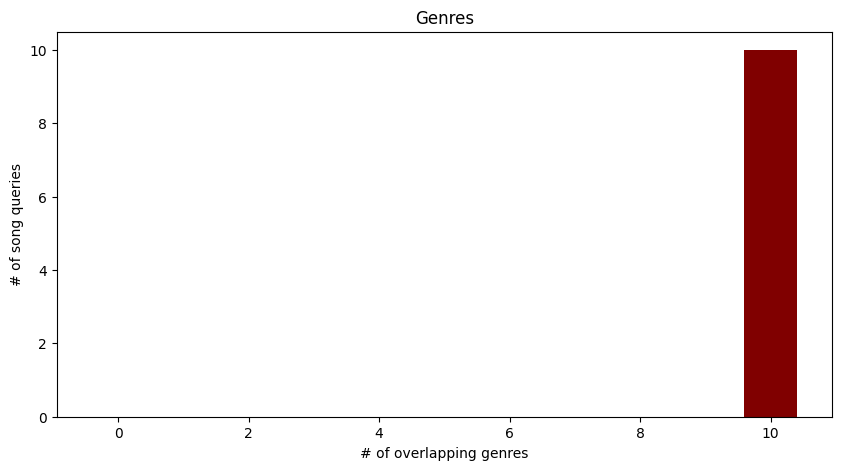

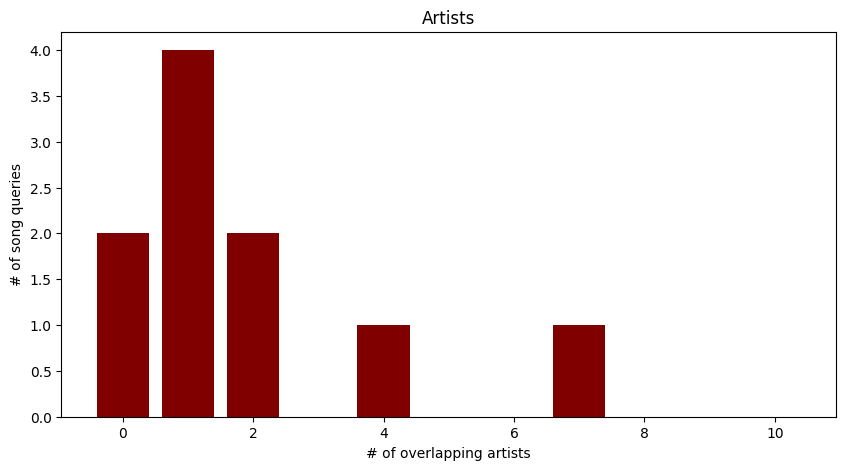

In [13]:
"""
THIS CELL IS FOR DATA COLLECTION AND PLOTTING.
"""
####CHANGE THESE VALUES####

NUM_RECS = 10
NUM_SAMPLES = 10

###########################


k = NUM_RECS + 1

knn = NearestNeighbors(n_neighbors=k, algorithm='auto')
knn.fit(scaled_tracks)

same_artist_count = {i: 0 for i in range(k)}
same_genre_count = {i: 0 for i in range(k)}

for n in range(NUM_SAMPLES):
    input_song = knntools.get_random_song(tracks, le_artist, le_track, n)
    print(f"Running sample {n}: '{input_song['track_name']}' by '{input_song['artist_name']}'")

    if isinstance(input_song, str):
        print("Song not found")

    else:
        num_same_artist = 0
        num_same_genre = 0

        input_song_dict = input_song

        genre_columns = [col for col in tracks.columns if 'genre_' in col]
        genre = [col.replace('genre_', '') for col in genre_columns if input_song_dict[col] == 1][0]
        
        artist = input_song_dict['artist_name']

        # print(artist, genre)

        similar_songs = knntools.find_similar_songs(input_song_dict, tracks, knn, scaler, le_artist, le_track)
        # print("Here's a few songs I recommend you listen to!")
        # print("=============================================")
        i = True
        for index, row in similar_songs.iterrows():
            # Lazy way of running first iteration on separate logic, doing this because knn returns original song too.
            if i:
                i = False
            else:
                new_genre = [col.replace('genre_', '') for col in genre_columns if input_song_dict[col] == 1][0]

                num_same_artist += artist == row['artist_name']
                num_same_genre += genre == new_genre

        
        same_artist_count[num_same_artist] += 1
        same_genre_count[num_same_genre] += 1






same_genre_keys = list(same_genre_count.keys())
same_genre_vals = list(same_genre_count.values())

fig = plt.figure(figsize = (10, 5))
plt.bar(same_genre_keys, same_genre_vals, color='maroon')

plt.xlabel("# of overlapping genres")
plt.ylabel("# of song queries")
plt.title("Genres")
plt.show()


same_artist_keys = list(same_artist_count.keys())
same_artist_vals = list(same_artist_count.values())

fig = plt.figure(figsize = (10, 5))
plt.bar(same_artist_keys, same_artist_vals, color='maroon')

plt.xlabel("# of overlapping artists")
plt.ylabel("# of song queries")
plt.title("Artists")
plt.show()

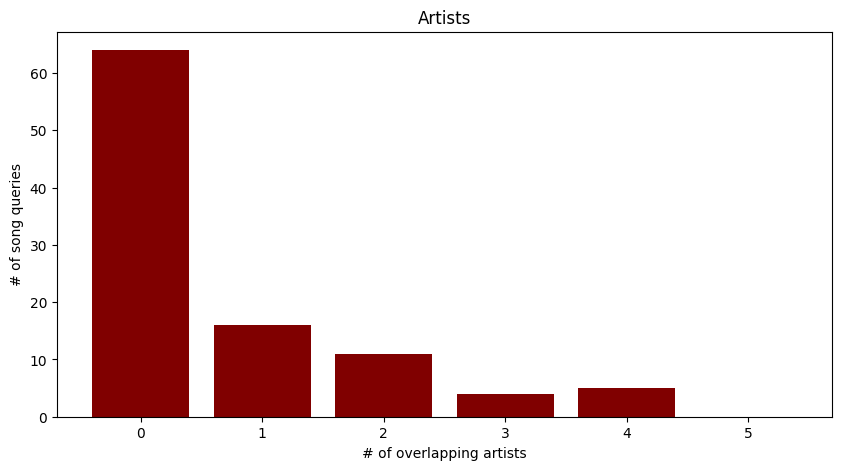

In [ ]:

same_artist_keys = list(same_artist_count.keys())
same_artist_vals = list(same_artist_count.values())

fig = plt.figure(figsize = (10, 5))
plt.bar(same_artist_keys, same_artist_vals, color='maroon')

plt.xlabel("# of overlapping artists")
plt.ylabel("# of song queries")
plt.title("Artists")
plt.show()